## Move to data directory

In [15]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install bs4
!pip install lxml
!pip install cchardet

You should consider upgrading via the 'C:\Users\ivana\Desktop\Documents\Research\UCR\DS-PATH\preprocessing\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\ivana\Desktop\Documents\Research\UCR\DS-PATH\preprocessing\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\ivana\Desktop\Documents\Research\UCR\DS-PATH\preprocessing\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\ivana\Desktop\Documents\Research\UCR\DS-PATH\preprocessing\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\ivana\Desktop\Documents\Research\UCR\DS-PATH\preprocessing\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\ivana\Desktop\Documents\Research\UCR\DS-PATH\preprocessing\venv\Scripts\python.exe -m pip install --upgrade pip' command.


     -------------------------------------- 115.1/115.1 KB 3.4 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\ivana\Desktop\Documents\Research\UCR\DS-PATH\preprocessing\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [17]:
import os
import sys
import pandas as pd
import numpy as np
from IPython.display import display
import time
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns
from bs4 import BeautifulSoup, SoupStrainer
import json
import threading
import cchardet

In [4]:
data_path = "C:\\Users\\ivana\\Desktop\\Documents\\Research\\UCR\\PiLabs\\DB\\Drugs"

In [7]:
# Get all the letter folders
source_folders = next(os.walk(data_path))[1]

I will iterate through each source folder, then through each letter folder, then through each file in the letter folder. Each path is then added to `total_paths` list, which will be used to append all json files into a big .csv dataset.

In [8]:
total_paths = []
# Iterate through all of the sources
for source in source_folders:
    # Get all the letter folders
    letter_folders = next(os.walk(data_path + "/" + source))[1]
    # Iterate through all of the letters
    for letter in letter_folders:
        # get all the files
        files = next(os.walk(data_path + "/" + source + "/" + letter))[2]
        for fil in files:
            print(f"Getting {data_path}/{source}/{letter}/{fil}...")
            total_paths.append(data_path + "/" + source + "/" + letter + "/" + fil)

Getting C:\Users\ivana\Desktop\Documents\Research\UCR\PiLabs\DB\Drugs/drugsCom/A/A & D topical.json...
Getting C:\Users\ivana\Desktop\Documents\Research\UCR\PiLabs\DB\Drugs/drugsCom/A/A-200 Lice Treatment.json...
Getting C:\Users\ivana\Desktop\Documents\Research\UCR\PiLabs\DB\Drugs/drugsCom/A/A-Caro-25.json...
Getting C:\Users\ivana\Desktop\Documents\Research\UCR\PiLabs\DB\Drugs/drugsCom/A/A-G Profen.json...
Getting C:\Users\ivana\Desktop\Documents\Research\UCR\PiLabs\DB\Drugs/drugsCom/A/A-Hydrocort.json...
Getting C:\Users\ivana\Desktop\Documents\Research\UCR\PiLabs\DB\Drugs/drugsCom/A/A-Methapred injection.json...
Getting C:\Users\ivana\Desktop\Documents\Research\UCR\PiLabs\DB\Drugs/drugsCom/A/A-Methapred.json...
Getting C:\Users\ivana\Desktop\Documents\Research\UCR\PiLabs\DB\Drugs/drugsCom/A/A-Phedrin.json...
Getting C:\Users\ivana\Desktop\Documents\Research\UCR\PiLabs\DB\Drugs/drugsCom/A/A1-Proteinase Inhibitor.json...
Getting C:\Users\ivana\Desktop\Documents\Research\UCR\PiLabs\DB

Print the first 5 paths just to make sure it is working correctly

In [9]:
for i in range(5):
    print(total_paths[i])

print(f"len: {len(total_paths)}")

C:\Users\ivana\Desktop\Documents\Research\UCR\PiLabs\DB\Drugs/drugsCom/A/A & D topical.json
C:\Users\ivana\Desktop\Documents\Research\UCR\PiLabs\DB\Drugs/drugsCom/A/A-200 Lice Treatment.json
C:\Users\ivana\Desktop\Documents\Research\UCR\PiLabs\DB\Drugs/drugsCom/A/A-Caro-25.json
C:\Users\ivana\Desktop\Documents\Research\UCR\PiLabs\DB\Drugs/drugsCom/A/A-G Profen.json
C:\Users\ivana\Desktop\Documents\Research\UCR\PiLabs\DB\Drugs/drugsCom/A/A-Hydrocort.json
len: 30314


Now I use `total_paths` to concatenate all of the json files together into a .csv file

In [10]:
beginning = time.time()
elems = []
btimes = []
times = []
df = pd.DataFrame()

concat_list = []

for i in range(len(total_paths)):
    # read the current DataFrame
    curr_beg_time = time.time()
    data = json.load(open(total_paths[i], "r"))
    curr_df = pd.DataFrame.from_dict(data, orient="index").T
    concat_list.append(curr_df)
    curr_end_time = time.time()
    # Reports
    # add in-betwee time for reporting
    btimes.append(curr_end_time - curr_beg_time)
    times.append(curr_end_time - beginning)
    elems.append(i + 1)
    print(f"Current time report for element {i + 1}/{len(total_paths)}: {curr_end_time - curr_beg_time} s.")

print(f"Concatenating...")
df = pd.concat(concat_list, axis=0)
print("Done concatenating.")

final = time.time()
print(f"Total time: {final - beginning} seconds")

display(df.head(10))

Current time report for element 1/30314: 0.00926661491394043 s.
Current time report for element 2/30314: 0.0074841976165771484 s.
Current time report for element 3/30314: 0.0075495243072509766 s.
Current time report for element 4/30314: 0.010745763778686523 s.
Current time report for element 5/30314: 0.008408784866333008 s.
Current time report for element 6/30314: 0.008576393127441406 s.
Current time report for element 7/30314: 0.009522199630737305 s.
Current time report for element 8/30314: 0.008321762084960938 s.
Current time report for element 9/30314: 0.009410381317138672 s.
Current time report for element 10/30314: 0.00909876823425293 s.
Current time report for element 11/30314: 0.008850336074829102 s.
Current time report for element 12/30314: 0.005564212799072266 s.
Current time report for element 13/30314: 0.014238119125366211 s.
Current time report for element 14/30314: 0.007170200347900391 s.
Current time report for element 15/30314: 0.008568525314331055 s.
Current time report

name  \
0                  A & D topical   
0           A-200 Lice Treatment   
0                      A-Caro-25   
0                     A-G Profen   
0                    A-Hydrocort   
0          A-Methapred injection   
0                    A-Methapred   
0                      A-Phedrin   
0        A1-Proteinase Inhibitor   
0  A200 Maximum Strength Topical   

                                            raw_html  \
0  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
0  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
0  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
0  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
0  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
0  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
0  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
0  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
0  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
0  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   

                                          source_url    date_time_scraped  \
0         https://www.drugs.com/mtm/a-d-topical.html  20/06/2022 20:04:41   
0  https://www.drugs.com/mtm/a-200-lice-treatment...  20/06/2022 22:24:03   
0          https://www.drugs.com/cons/a-caro-25.html  20/06/2022 19:43:32   
0         https://www.drugs.com/cons/a-g-profen.html  20/06/2022 20:19:41   
0        https://www.drugs.com/cons/a-hydrocort.html  20/06/2022 20:21:22   
0  https://www.drugs.com/mtm/a-methapred-injectio...  20/06/2022 20:57:25   
0        https://www.drugs.com/cons/a-methapred.html  20/06/2022 20:57:20   
0           https://www.drugs.com/mtm/a-phedrin.html  20/06/2022 21:33:03   
0  https://www.drugs.com/monograph/a1-proteinase-...  20/06/2022 22:24:08   
0  https://www.drugs.com/cons/a200-maximum-streng...  20/06/2022 22:24:14   

  source_name  
0   drugs.com  
0   drugs.com  
0   drugs.com  
0   drugs.com  
0   drugs.com  
0   drugs.com  
0   drugs.com  
0   drugs.com  
0   drugs.com  
0   drugs.com

## Plotting the times for reporting

In [11]:
sns.set_theme()

c:\Users\ivana\Desktop\Documents\Research\UCR\DS-PATH\preprocessing\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


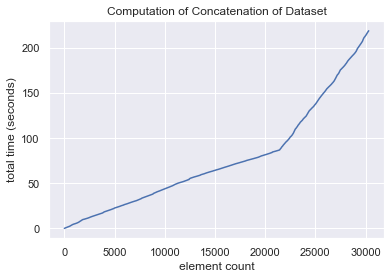

c:\Users\ivana\Desktop\Documents\Research\UCR\DS-PATH\preprocessing\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


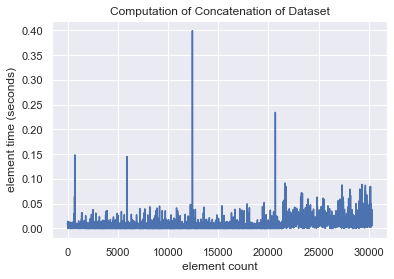

In [12]:
sns.lineplot(elems, times)
plt.title("Computation of Concatenation of Dataset")
plt.xlabel("element count")
plt.ylabel("total time (seconds)")
plt.show()

sns.lineplot(elems, btimes)
plt.title("Computation of Concatenation of Dataset")
plt.xlabel("element count")
plt.ylabel("element time (seconds)")
plt.show()

The first plot above shows the total time versus the element being concatenated. I sought to find a connection between the time that the program is taking in total versus the number of elements, to see if having too many elements would impact our run time. **The number of elements does not appear to impact runtime, and runtime seems to be of linear order.**

I also save the .csv file to `data.csv`. This is saved on the same path as `data_path` to be consistent.

In [15]:
df.reset_index()
df.to_csv(data_path + "/data.csv", index=False)
df.head(20)

name  \
0                                A & D topical   
0                         A-200 Lice Treatment   
0                                    A-Caro-25   
0                                   A-G Profen   
0                                  A-Hydrocort   
0                        A-Methapred injection   
0                                  A-Methapred   
0                                    A-Phedrin   
0                      A1-Proteinase Inhibitor   
0                A200 Maximum Strength Topical   
0             A200 Time-Tested Formula Topical   
0                                     A/B Otic   
0              Abacavir and Lamivudine Tablets   
0                      Abacavir and lamivudine   
0                       Abacavir Oral Solution   
0                     Abacavir Sulfate Tablets   
0       Abacavir, dolutegravir, and lamivudine   
0  Abacavir, Lamivudine and Zidovudine Tablets   
0         Abacavir, lamivudine, and zidovudine   
0                                     Abacavir   

                                            raw_html  \
0  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
0  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
0  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
0  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
0  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
0  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
0  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
0  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
0  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
0  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
0  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
0  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
0  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
0  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
0  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
0  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
0  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
0  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
0  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
0  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   

                                          source_url    date_time_scraped  \
0         https://www.drugs.com/mtm/a-d-topical.html  20/06/2022 20:04:41   
0  https://www.drugs.com/mtm/a-200-lice-treatment...  20/06/2022 22:24:03   
0          https://www.drugs.com/cons/a-caro-25.html  20/06/2022 19:43:32   
0         https://www.drugs.com/cons/a-g-profen.html  20/06/2022 20:19:41   
0        https://www.drugs.com/cons/a-hydrocort.html  20/06/2022 20:21:22   
0  https://www.drugs.com/mtm/a-methapred-injectio...  20/06/2022 20:57:25   
0        https://www.drugs.com/cons/a-methapred.html  20/06/2022 20:57:20   
0           https://www.drugs.com/mtm/a-phedrin.html  20/06/2022 21:33:03   
0  https://www.drugs.com/monograph/a1-proteinase-...  20/06/2022 22:24:08   
0  https://www.drugs.com/cons/a200-maximum-streng...  20/06/2022 22:24:14   
0  https://www.drugs.com/cons/a200-time-tested-fo...  20/06/2022 22:24:19   
0           https://www.drugs.com/cons/a-b-otic.html  20/06/2022 19:38:51   
0  https://www.drugs.com/pro/abacavir-and-lamivud...  20/06/2022 19:39:07   
0  https://www.drugs.com/mtm/abacavir-and-lamivud...  20/06/2022 19:39:01   
0  https://www.drugs.com/pro/abacavir-oral-soluti...  20/06/2022 19:39:12   
0  https://www.drugs.com/pro/abacavir-sulfate-tab...  20/06/2022 19:39:17   
0  https://www.drugs.com/mtm/abacavir-dolutegravi...  20/06/2022 19:39:22   
0  https://www.drugs.com/pro/abacavir-lamivudine-...  20/06/2022 19:39:28   
0  https://www.drugs.com/mtm/abacavir-lamivudine-...  20/06/2022 19:39:33   
0            https://www.drugs.com/mtm/abacavir.html  20/06/2022 19:38:56   

  source_name  
0   drugs.com  
0   drugs.com  
0   drugs.com  
0   drugs.com  
0   drugs.com  
0   drugs.com  
0   drugs.com  
0   drugs.com  
0   drugs.com  
0   drugs.com  
0   drugs.com  
0   

## Read dataset again

We do this so that we do not harm the previously saved dataset. Instead, we simply read it again and do not risk modifying it until we save it again.

In [46]:
df_saved = pd.read_csv(data_path + "/data.csv", nrows=None)
df_saved.head(10)

name  \
0                  A & D topical   
1           A-200 Lice Treatment   
2                      A-Caro-25   
3                     A-G Profen   
4                    A-Hydrocort   
5          A-Methapred injection   
6                    A-Methapred   
7                      A-Phedrin   
8        A1-Proteinase Inhibitor   
9  A200 Maximum Strength Topical   

                                            raw_html  \
0  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
1  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
2  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
3  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
4  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
5  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
6  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
7  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
8  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
9  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   

                                          source_url    date_time_scraped  \
0         https://www.drugs.com/mtm/a-d-topical.html  20/06/2022 20:04:41   
1  https://www.drugs.com/mtm/a-200-lice-treatment...  20/06/2022 22:24:03   
2          https://www.drugs.com/cons/a-caro-25.html  20/06/2022 19:43:32   
3         https://www.drugs.com/cons/a-g-profen.html  20/06/2022 20:19:41   
4        https://www.drugs.com/cons/a-hydrocort.html  20/06/2022 20:21:22   
5  https://www.drugs.com/mtm/a-methapred-injectio...  20/06/2022 20:57:25   
6        https://www.drugs.com/cons/a-methapred.html  20/06/2022 20:57:20   
7           https://www.drugs.com/mtm/a-phedrin.html  20/06/2022 21:33:03   
8  https://www.drugs.com/monograph/a1-proteinase-...  20/06/2022 22:24:08   
9  https://www.drugs.com/cons/a200-maximum-streng...  20/06/2022 22:24:14   

  source_name  
0   drugs.com  
1   drugs.com  
2   drugs.com  
3   drugs.com  
4   drugs.com  
5   drugs.com  
6   drugs.com  
7   drugs.com  
8   drugs.com  
9   drugs.com

## Parse the definitions

Further, we do not have the definitions of each concept (for now just drugs), so for each source we will parse through the html content and grab the definitions

First we separate the DataFrame into each of the drug sources

In [47]:
# df_drugscom = df_saved[df_saved.source_name == "drugs.com"]
# df_mayoclinic = df_saved[df_saved.source_name == "Mayoclinic"]
# df_webmd = df_saved[df_saved.source_name == "WebMD"]
# df_medline = df_saved[df_saved.source_name == "Medline"]


Now we can apply a function to each one

In [ ]:
# s = time.time()

# def grab_drugs():
#     i = 0
#     def grab(x):
#         global i
#         ss = time.time() # timekeeping
#         # x refers to the raw_html column input
#         parse_only = SoupStrainer(attrs = {"class" : "contentBox"})
#         bs = BeautifulSoup(x, "lxml", parse_only=parse_only)
#         mydivs = bs.find_all("div", attrs={"class": "contentBox"})
#         string = ""
#         interest_p = mydivs[0].find_all("p", attrs={"class" : None})[0:6]
#         string = ""
#         for p in interest_p:
#             string += p.text
#         ee = time.time()
#         print(f"[DRUGSCOM] successful processing {i}/{len(df_drugscom)} ({ee - ss}s)\n")
#         i += 1
#         return string
#     df_drugscom["definition"] = df_drugscom["raw_html"].apply(grab)

# def grab_mayo():
#     i = 0
#     def grab(x):
#         # x refers to the raw_html column input
#         global i
#         ss = time.time()
#         parse_only = SoupStrainer(attrs = {"id" : "main-content"})
#         bs = BeautifulSoup(x, "lxml", parse_only=parse_only)
#         mydivs = bs.find_all("div", attrs={"id" : "main-content"})
#         string = ""
#         if len(mydivs) == 0:
#             return None
#         interest_p = mydivs[0].find_all("p", attrs={"class" : None})[1:6]
#         for p in interest_p:
#             string += p.text
#         ee = time.time()
#         print(f"[MAYOCLINIC] successful processing {i}/{len(df_mayoclinic)} ({ee - ss}s)\n")
#         i += 1
#         return string
#     df_mayoclinic["definition"] = df_mayoclinic["raw_html"].apply(grab)

# # def grab_webmd():
# #     def grab(x):
# #         bs = BeautifulSoup(x, "lxml")
# #         mydivs = 
# #         pass
# #     pass

# # def grab_medline():
# #     def grab(x):
# #         pass
# #     pass

# function_list = [grab_drugs, grab_mayo]

# for i in range(len(function_list)):
#     thread = threading.Thread(target = function_list[i])
#     print(f"Starting thread for ({function_list[i].__name__})")
#     thread.start()

# e = time.time()
# print(f"Total time taken: {e - s}s")

In [48]:
# display(df_drugscom.head(10))
# display(df_mayoclinic.head(10))
# display(df_webmd.head(10))
# display(df_medline.head(10))

name  \
0                  A & D topical   
1           A-200 Lice Treatment   
2                      A-Caro-25   
3                     A-G Profen   
4                    A-Hydrocort   
5          A-Methapred injection   
6                    A-Methapred   
7                      A-Phedrin   
8        A1-Proteinase Inhibitor   
9  A200 Maximum Strength Topical   

                                            raw_html  \
0  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
1  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
2  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
3  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
4  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
5  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
6  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
7  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
8  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
9  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   

                                          source_url    date_time_scraped  \
0         https://www.drugs.com/mtm/a-d-topical.html  20/06/2022 20:04:41   
1  https://www.drugs.com/mtm/a-200-lice-treatment...  20/06/2022 22:24:03   
2          https://www.drugs.com/cons/a-caro-25.html  20/06/2022 19:43:32   
3         https://www.drugs.com/cons/a-g-profen.html  20/06/2022 20:19:41   
4        https://www.drugs.com/cons/a-hydrocort.html  20/06/2022 20:21:22   
5  https://www.drugs.com/mtm/a-methapred-injectio...  20/06/2022 20:57:25   
6        https://www.drugs.com/cons/a-methapred.html  20/06/2022 20:57:20   
7           https://www.drugs.com/mtm/a-phedrin.html  20/06/2022 21:33:03   
8  https://www.drugs.com/monograph/a1-proteinase-...  20/06/2022 22:24:08   
9  https://www.drugs.com/cons/a200-maximum-streng...  20/06/2022 22:24:14   

  source_name  
0   drugs.com  
1   drugs.com  
2   drugs.com  
3   drugs.com  
4   drugs.com  
5   drugs.com  
6   drugs.com  
7   drugs.com  
8   drugs.com  
9   drugs.com

name  \
11451  13c Urea And Citric Acid (Oral Route)   
11452                  14c Urea (Oral Route)   
11453      Antifungal, Azole (Vaginal Route)   
11454       Benzoyl Peroxide (Topical Route)   
11455                Lamivudine (Oral Route)   
11456               Methoxsalen (Oral Route)   
11457            Oxymetazoline (Nasal Route)   
11458           Pseudoephedrine (Oral Route)   
11459             Pyrithione (Topical Route)   
11460                  Abacavir (Oral Route)   

                                                raw_html  \
11451  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
11452  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
11453  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
11454  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
11455  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
11456  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
11457  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
11458  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
11459  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
11460  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   

                                              source_url    date_time_scraped  \
11451  https://www.mayoclinic.org/drugs-supplements/1...  21/06/2022 09:11:21   
11452  https://www.mayoclinic.org/drugs-supplements/1...  21/06/2022 09:11:26   
11453  https://www.mayoclinic.org/drugs-supplements/a...  21/06/2022 09:11:47   
11454  https://www.mayoclinic.org/drugs-supplements/b...  21/06/2022 14:42:01   
11455  https://www.mayoclinic.org/drugs-supplements/l...  21/06/2022 09:11:52   
11456                   https://www.mayoclinic.org#index  21/06/2022 09:12:24   
11457  https://www.mayoclinic.org/drugs-supplements/o...  21/06/2022 09:11:58   
11458  https://www.mayoclinic.org/drugs-supplements/p...  21/06/2022 09:11:15   
11459  https://www.mayoclinic.org/drugs-supplements/p...  21/06/2022 09:11:31   
11460  https://www.mayoclinic.org/drugs-supplements/a...  20/06/2022 19:39:06   

      source_name  
11451  Mayoclinic  
11452  Mayoclinic  
11453  Mayoclinic  
11454  Mayoclinic  
11455  Mayoclinic  
11456  Mayoclinic  
11457  Mayoclinic  
11458  Mayoclinic  
11459  Mayoclinic  
11460  Mayoclinic

name  \
21396      a thru z 18 mg-500 mcg-300 mcg-250 mcg tablet   
21397                     a thru z select women's tablet   
21398  a-carn 100 mg-a-cyst 37.5 mg-ala 25 mg-q10 mg-...   
21399                                            a-g pro   
21400                                   a-hydrocort vial   
21401                     abacavir-lamivudine-zidovudine   
21402                                abacavir-lamivudine   
21403                                           abacavir   
21404                                           abc plus   
21405  abecma 300x10exp6 to 460x10exp6 cell intraveno...   

                                                raw_html  \
21396  <!DOCTYPE html>\n<html class="no-js" lang="en"...   
21397  <!DOCTYPE html>\n<html class="no-js" lang="en"...   
21398  <!DOCTYPE html>\n<html class="no-js" lang="en"...   
21399  <!DOCTYPE html>\n<html class="no-js" lang="en"...   
21400  <!DOCTYPE html>\n<html class="no-js" lang="en"...   
21401  <!DOCTYPE html>\n<html class="no-js" lang="en"...   
21402  <!DOCTYPE html>\n<html class="no-js" lang="en"...   
21403  <!DOCTYPE html>\n<html class="no-js" lang="en"...   
21404  <!DOCTYPE html>\n<html class="no-js" lang="en"...   
21405  <!DOCTYPE html>\n<html class="no-js" lang="en"...   

                                   source_url    date_time_scraped source_name  
21396  https://www.webmd.com//drugs/2/alpha/a  20/06/2022 21:47:39       WebMD  
21397  https://www.webmd.com//drugs/2/alpha/a  21/06/2022 14:25:05       WebMD  
21398  https://www.webmd.com//drugs/2/alpha/a  21/06/2022 14:25:11       WebMD  
21399  https://www.webmd.com//drugs/2/alpha/a  21/06/2022 14:25:17       WebMD  
21400  https://www.webmd.com//drugs/2/alpha/a  21/06/2022 14:25:22       WebMD  
21401  https://www.webmd.com//drugs/2/alpha/a  21/06/2022 14:25:45       WebMD  
21402  https://www.webmd.com//drugs/2/alpha/a  21/06/2022 14:25:39       WebMD  
21403  https://www.webmd.com//drugs/2/alpha/a  21/06/2022 14:25:33       WebMD  
21404  https://www.webmd.com//drugs/2/alpha/a  21/06/2022 14:25:51       WebMD  
21405  https://www.webmd.com//drugs/2/alpha/a  21/06/2022 14:25:57       WebMD

name  \
21282                                 Abacavir   
21283                              Abiraterone   
21284  Acetaminophen, Butalbital, and Caffeine   
21285                      Acyclovir Injection   
21286                        Acyclovir Topical   
21287                                Acyclovir   
21288                              Allopurinol   
21289                                  Aspirin   
21290                             Azithromycin   
21291                              Benzonatate   

                                                raw_html  \
21282  <!DOCTYPE html>\n<html class="nojs us" data-ro...   
21283  <!DOCTYPE html>\n<html class="nojs us" data-ro...   
21284  <!DOCTYPE html>\n<html class="nojs us" data-ro...   
21285  <!DOCTYPE html>\n<html class="nojs us" data-ro...   
21286  <!DOCTYPE html>\n<html class="nojs us" data-ro...   
21287  <!DOCTYPE html>\n<html class="nojs us" data-ro...   
21288  <!DOCTYPE html>\n<html class="nojs us" data-ro...   
21289  <!DOCTYPE html>\n<html class="nojs us" data-ro...   
21290  <!DOCTYPE html>\n<html class="nojs us" data-ro...   
21291  <!DOCTYPE html>\n<html class="nojs us" data-ro...   

                                              source_url    date_time_scraped  \
21282  https://medlineplus.gov/druginfo/meds/a699012....  21/06/2022 14:30:10   
21283  https://medlineplus.gov/druginfo/meds/a611046....  21/06/2022 14:38:55   
21284  https://medlineplus.gov/druginfo/meds/a601009....  21/06/2022 14:27:27   
21285  https://medlineplus.gov/druginfo/meds/a681036....  21/06/2022 14:36:12   
21286  https://medlineplus.gov/druginfo/meds/a606001....  21/06/2022 14:36:18   
21287  https://medlineplus.gov/druginfo/meds/a681045....  21/06/2022 14:36:23   
21288  https://medlineplus.gov/druginfo/meds/a682673....  21/06/2022 14:37:49   
21289  https://medlineplus.gov/druginfo/meds/a682878....  21/06/2022 14:35:17   
21290  https://medlineplus.gov/druginfo/meds/a697037....  21/06/2022 14:32:26   
21291  https://medlineplus.gov/druginfo/meds/a682640....  21/06/2022 14:34:41   

      source_name  
21282     Medline  
21283     Medline  
21284     Medline  
21285     Medline  
21286     Medline  
21287     Medline  
21288     Medline  
21289     Medline  
21290     Medline  
21291     Medline

In [50]:
# n number of paragraphs of interest
n = 6
elems = []   # timekeeping
times = []   # timekeeping
btimes = []  # timekeeping

beg_t = time.time() # timekeeping

i = 0

def parseDefinitions(raw_html, source_name):
    global i

    ss = time.time()
    if (i % 1000 == 0):
        print(f"Done with element {i}/{len(df_saved)}")
    elems.append(i+1)
    i += 1

    if source_name == "drugs.com": # drugs.com is the source
        parse_only = SoupStrainer(attrs = {"class" : "contentBox"})
        bs = BeautifulSoup(raw_html, "lxml", parse_only=parse_only)
        mydivs = bs.find_all("div", attrs={"class": "contentBox"})
        string = ""
        if len(mydivs) == 0:
            return None
        interest_p = mydivs[0].find_all("p", attrs={"class" : None})[0:6]
        for p in interest_p:
            string += p.text
        ee = time.time()
        times.append(ee - beg_t)
        btimes.append(ee - ss)
        return string
    elif source_name == "Mayoclinic": # Mayoclinic is the source
        parse_only = SoupStrainer(attrs = {"id" : "main-content"})
        bs = BeautifulSoup(raw_html, "lxml", parse_only=parse_only)
        mydivs = bs.find_all("div", attrs={"id" : "main-content"})
        string = ""
        if len(mydivs) == 0:
            return None
        interest_p = mydivs[0].find_all("p", attrs={"class" : None})[1:6]
        for p in interest_p:
            string += p.text
        ee = time.time()
        times.append(ee - beg_t)
        btimes.append(ee - ss)
        return string
    elif source_name == "WebMD": # WebMD is the source
        parse_only = SoupStrainer(attrs = {"class" : "monograph-content monograph-content-holder"})
        bs = BeautifulSoup(raw_html, "lxml", parse_only=parse_only)
        mydivs = bs.find_all("div", attrs={"class" : "monograph-content monograph-content-holder"})
        string = ""
        if len(mydivs) == 0:
            return None
        interest_p = mydivs[0].find_all("p", attrs={"class" : None})[1:6]
        for p in interest_p:
            string += p.text
        ee = time.time()
        times.append(ee - beg_t)
        btimes.append(ee - ss)
        return string
    elif source_name == "Medline": # Medline is the source
        # section-body
        parse_only = SoupStrainer(attrs = {"class" : "section-body"})
        bs = BeautifulSoup(raw_html, "lxml", parse_only=parse_only)
        mydivs = bs.find_all("div", attrs={"class" : "section-body"})
        string = ""
        if len(mydivs) == 0:
            return None
        interest_p = mydivs[0].find_all("p", attrs={"class" : None})[1:6]
        for p in interest_p:
            string += p.text
        ee = time.time()
        times.append(ee - beg_t)
        btimes.append(ee - ss)
        return string
    else:
        return None

df_saved["definition"] = df_saved.apply(lambda x : parseDefinitions(x["raw_html"], x["source_name"]), axis=1)

end_t = time.time()
print(f"Total time: {end_t - beg_t}")

Done with element 0/30314


c:\Users\ivana\Desktop\Documents\Research\UCR\DS-PATH\preprocessing\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


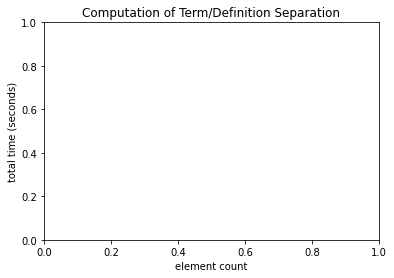

c:\Users\ivana\Desktop\Documents\Research\UCR\DS-PATH\preprocessing\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


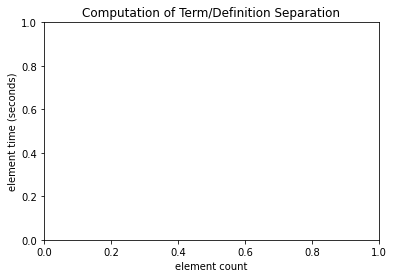

In [41]:
sns.lineplot(elems, times)
plt.title("Computation of Term/Definition Separation")
plt.xlabel("element count")
plt.ylabel("total time (seconds)")
plt.show()

sns.lineplot(elems, btimes)
plt.title("Computation of Term/Definition Separation")
plt.xlabel("element count")
plt.ylabel("element time (seconds)")
plt.show()

## Clean definition column

In [42]:
df_saved["definition"] = df_saved["definition"].replace("\s+|\n", " ", regex=True)
df_saved[df_saved["source_name"] == "Mayoclinic"].head(10)

name  \
11451  13c Urea And Citric Acid (Oral Route)   
11452                  14c Urea (Oral Route)   
11453      Antifungal, Azole (Vaginal Route)   
11454       Benzoyl Peroxide (Topical Route)   
11455                Lamivudine (Oral Route)   
11456               Methoxsalen (Oral Route)   
11457            Oxymetazoline (Nasal Route)   
11458           Pseudoephedrine (Oral Route)   
11459             Pyrithione (Topical Route)   
11460                  Abacavir (Oral Route)   

                                                raw_html  \
11451  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
11452  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
11453  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
11454  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
11455  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
11456  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
11457  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
11458  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
11459  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   
11460  <!DOCTYPE html>\n<html lang="en">\n <head>\n  ...   

                                              source_url    date_time_scraped  \
11451  https://www.mayoclinic.org/drugs-supplements/1...  21/06/2022 09:11:21   
11452  https://www.mayoclinic.org/drugs-supplements/1...  21/06/2022 09:11:26   
11453  https://www.mayoclinic.org/drugs-supplements/a...  21/06/2022 09:11:47   
11454  https://www.mayoclinic.org/drugs-supplements/b...  21/06/2022 14:42:01   
11455  https://www.mayoclinic.org/drugs-supplements/l...  21/06/2022 09:11:52   
11456                   https://www.mayoclinic.org#index  21/06/2022 09:12:24   
11457  https://www.mayoclinic.org/drugs-supplements/o...  21/06/2022 09:11:58   
11458  https://www.mayoclinic.org/drugs-supplements/p...  21/06/2022 09:11:15   
11459  https://www.mayoclinic.org/drugs-supplements/p...  21/06/2022 09:11:31   
11460  https://www.mayoclinic.org/drugs-supplements/a...  20/06/2022 19:39:06   

      source_name                                         definition  
11451  Mayoclinic   13C urea and citric acid are medicines used i...  
11452  Mayoclinic   Urea C 14 is a radiopharmaceutical. It is use...  
11453  Mayoclinic   Vaginal azoles are used to treat yeast (fungu...  
11454  Mayoclinic   Benzoyl peroxide topical is used to treat acn...  
11455  Mayoclinic   Lamivudine is used in combination with other ...  
11456  Mayoclinic                                               None  
11457  Mayoclinic   Oxymetazoline is used for the temporary relie...  
11458  Mayoclinic   Pseudoephedrine is used to relieve nasal or s...  
11459  Mayoclinic   Pyrithione is used to help control the sympto...  
11460  Mayoclinic   Abacavir is used together with other medicine...

<AxesSubplot:ylabel='source_name'>

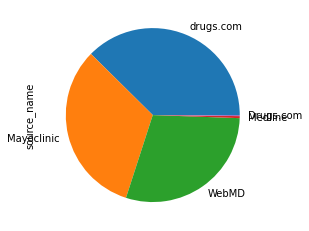

In [49]:
df_saved["source_name"].value_counts().plot(kind="pie")

Now I want to simply take a look at the columns which contain the definitions, as well as the name column. I want to make sure the definitions are correct (at a glance, but not in depth).

In [ ]:
pd.options.display.max_colwidth = 200
df_saved[["name", "definition"]].head(10)

name  \
0                                     A B Otic   
1                                     Abacavir   
2                      Abacavir and lamivudine   
3              Abacavir and Lamivudine Tablets   
4                       Abacavir Oral Solution   
5                     Abacavir Sulfate Tablets   
6       Abacavir, dolutegravir, and lamivudine   
7  Abacavir, Lamivudine and Zidovudine Tablets   
8         Abacavir, lamivudine, and zidovudine   
9                                Abaloparatide   

                                                                                                                                                                                                definition  
0   In the U.S. Pharmacologic Class: NSAID Chemical Class: Pyrazolone Antipyrine and benzocaine combination is used in the ear to help relieve the pain, swelling, and congestion of some ear infection...  
1   Abacavir is an antiviral medicine that prevents human immunodeficiency virus ( HIV ) from multiplying in your body. Abacavir is used to treat HIV, the virus that can cause acquired immunodeficien...  
2   Abacavir and lamivudine are antiviral medicines that prevent human immunodeficiency virus ( HIV ) from multiplying in your body. Abacavir and lamivudine is a combination medicine used to treat HI...  
3   Use of EPIVIR (lamivudine) oral solution or tablets and ZIAGEN (abacavir) oral solution may be considered. • who have the HLA-B*5701 allele [see Warnings and Precautions (5.1) ]. • with prior hyp...  
4   Patients who carry the HLA-B*5701 allele are at a higher risk of a hypersensitivity reaction to abacavir; although, hypersensitivity reactions have occurred in patients who do not carry the HLA-B...  
5   Abacavir is contraindicated in patients with a prior hypersensitivity reaction to abacavir and in HLA-B*5701-positive patients [see Contraindications ( 4 ), Warnings and Precautions ( 5.1 )]. All...  
6   Abacavir , dolutegravir , and lamivudine is a combination medicine used to treat human immunodeficiency virus ( HIV ), the virus that can cause acquired immunodeficiency syndrome (AIDS). abacavir...  
7   Serious and sometimes fatal hypersensitivity reactions, with multiple organ involvement, have occurred with abacavir, a component of Abacavir, Lamivudine and Zidovudine Tablets. Patients who carr...  
8   Abacavir , lamivudine , and zidovudine are antiviral medications that prevent human immunodeficiency virus ( HIV ) from multiplying in your body. Abacavir, lamivudine, and zidovudine (Trizivir) i...  
9   Abaloparatide is used to treat osteoporosis in postmenopausal women who have a high risk of bone fracture . Abaloparatide may also be used for purposes not listed in this medication guide. Abalop...